In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import os
import random

In [21]:
# Initialising the CNN
classifier = Sequential()

In [22]:
# Step 1 - Convolution
classifier.add(Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
classifier.add(Conv2D(64,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
Total params: 37856 (147.88 KB)
Trainable params: 3785

In [24]:
classifier.add(Flatten())

In [25]:
classifier.add(Dense(units = 128, activation ='relu'))

In [26]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)             

In [38]:
base_dir = r'E:\DATA\dog_cat_CNN\train'
dog_dir = os.path.join(base_dir, 'dog')
cat_dir = os.path.join(base_dir, 'cat')

In [39]:
# Get all dog and cat image filenames
all_dog_images = os.listdir(dog_dir)
all_cat_images = os.listdir(cat_dir)

# Shuffle the lists
random.shuffle(all_dog_images)
random.shuffle(all_cat_images)

In [40]:
# Select the first 20% of the shuffled list
selected_dog_images = all_dog_images[:int(len(all_dog_images) * 0.2)]
selected_cat_images = all_cat_images[:int(len(all_cat_images) * 0.2)]

In [41]:
# Define new directories for the selected subset
subset_base_dir = r'E:\DATA\dog_cat_CNN\subset_train'
subset_dog_dir = os.path.join(subset_base_dir, 'dog')
subset_cat_dir = os.path.join(subset_base_dir, 'cat')

# Create the directories if they don't exist
os.makedirs(subset_dog_dir, exist_ok=True)
os.makedirs(subset_cat_dir, exist_ok=True)

In [42]:
import shutil

# Copy selected dog images to the new directory
for img_name in selected_dog_images:
    src_path = os.path.join(dog_dir, img_name)
    dst_path = os.path.join(subset_dog_dir, img_name)
    shutil.copy(src_path, dst_path)

# Copy selected cat images to the new directory
for img_name in selected_cat_images:
    src_path = os.path.join(cat_dir, img_name)
    dst_path = os.path.join(subset_cat_dir, img_name)
    shutil.copy(src_path, dst_path)

In [43]:
datagen = ImageDataGenerator(validation_split=0.2,
                                               rescale = 1./255,
                                                shear_range = 0.2,
                                                zoom_range = 0.2,
                                                horizontal_flip = True)

In [44]:
training_set = datagen.flow_from_directory(
    subset_base_dir,
    target_size=(64, 64),  
    batch_size=32,
    class_mode='binary',
    subset='training',  # Set as training data
    shuffle=True,
    seed=42
)

Found 4000 images belonging to 2 classes.


In [49]:
test_set = datagen.flow_from_directory(
    subset_base_dir,
    target_size=(64, 64),  
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Set as training data
    shuffle=True,
    seed=42
)

Found 1000 images belonging to 2 classes.


In [50]:
model = classifier.fit(training_set,
                         steps_per_epoch = 125,
                         epochs = 10,
                         validation_data = test_set,    
                         validation_steps = 31)


Epoch 1/10
125/125 [==============================] - 32s 259ms/step - loss: 0.5277 - accuracy: 0.7297 - val_loss: 0.5009 - val_accuracy: 0.7450
Epoch 2/10
125/125 [==============================] - 32s 257ms/step - loss: 0.5061 - accuracy: 0.7473 - val_loss: 0.5082 - val_accuracy: 0.7470
Epoch 3/10
125/125 [==============================] - 32s 254ms/step - loss: 0.4849 - accuracy: 0.7700 - val_loss: 0.4658 - val_accuracy: 0.7661
Epoch 4/10
125/125 [==============================] - 34s 272ms/step - loss: 0.4639 - accuracy: 0.7815 - val_loss: 0.4823 - val_accuracy: 0.7621
Epoch 5/10
125/125 [==============================] - 34s 271ms/step - loss: 0.4539 - accuracy: 0.7870 - val_loss: 0.5010 - val_accuracy: 0.7621
Epoch 6/10
125/125 [==============================] - 33s 265ms/step - loss: 0.4404 - accuracy: 0.7900 - val_loss: 0.4397 - val_accuracy: 0.7873
Epoch 7/10
125/125 [==============================] - 32s 255ms/step - loss: 0.4169 - accuracy: 0.8000 - val_loss: 0.4746 - val_ac

In [53]:
print(training_set.class_indices)
print(test_set.class_indices)



{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1}


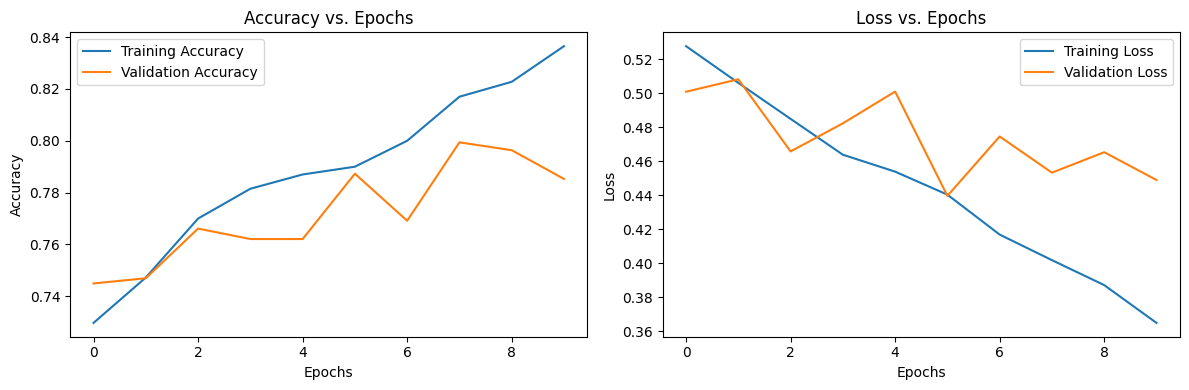

In [56]:
import matplotlib.pyplot as plt


# Plotting the learning curve (accuracy vs. epochs)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model.history['accuracy'], label='Training Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss curve (loss vs. epochs)
plt.subplot(1, 2, 2)
plt.plot(model.history['loss'], label='Training Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [51]:
classifier.save("model.h5")
print("Saved model to disk")

c:\Users\navee\anaconda3\envs\dog_cat_classification\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model to disk


In [58]:
from keras.models import load_model

loaded_model = load_model("model.h5")

In [60]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'E:\DATA\dog_cat_CNN\test1\test1\11.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)

if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

1/1 [==============================] - 0s 27ms/step
cat
